### FIGURE

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from random import randrange
from py_pcha.PCHA import PCHA
import numpy as np
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"

In [3]:
def validate(point, poly):
    """Validate if point is inside polygon.

    Algorithm from http://www.ariel.com.au/a/python-point-int-poly.html
    
    Parameters
    ----------
    point : (float, float)
    poly : list of 2-tuples
        List of cornerpoints that constitute the polygon, ordered convex clockwise.
    
    Returns
    -------
    inside : bool
        If True, point is inside campus, else False.
    """
    x, y = point

    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

In [15]:
poly1 = [(0, 1.5), (1.5, 2), (1, 0)]
poly2 = [(0, 1.5), (1.5, 2), (2, 1), (1, 0)]

def sample_points_in_polygon(poly, N, noise_level):
    x = [i[0] for i in poly]
    y = [i[1] for i in poly]

    max_x, min_x = max(x), min(x)
    max_y, min_y = max(y), min(y)

    points = []
    while len(points) < N:
        point_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000)
        point_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000)
        if validate((point_x, point_y), poly):
            if noise_level > 0:
                noise_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000) * noise_level
                noise_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000) * noise_level
                points.append((point_x + noise_x, point_y + noise_y))
            else:
                points.append((point_x, point_y))
    return points

points1 = sample_points_in_polygon(poly1, 500, 0.5)
points2 = sample_points_in_polygon(poly2, 500, 0.5)

In [16]:
X1 = np.array(points1).T
X2 = np.array(points2).T
A1, S1, C1, _, _= PCHA(X1, 3, delta=0.4)
A2, S2, C2, _, _= PCHA(X2, 4, delta=0.4)

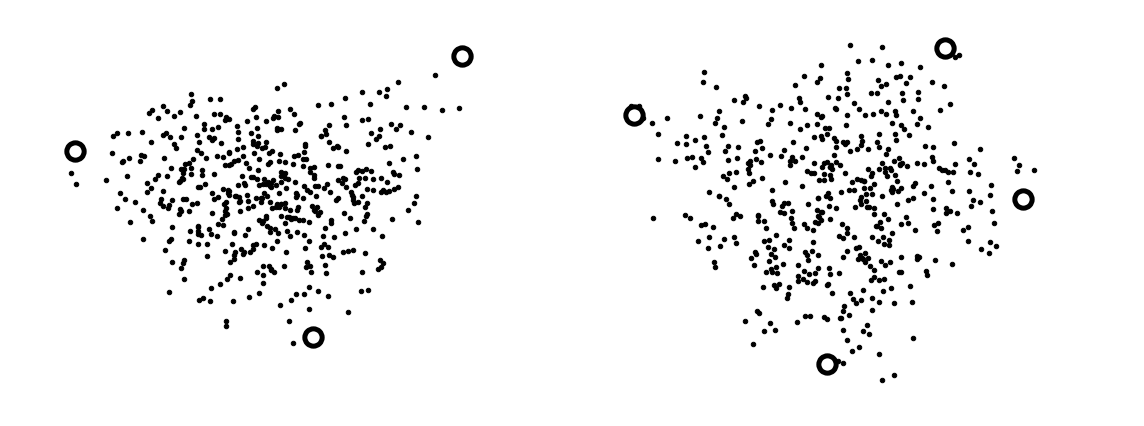

In [191]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter([i[0] for i in points1], [i[1] for i in points1], c="k")
plt.scatter(A1[0, :], A1[1, :], c="w", s=300, lw=5)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.scatter([i[0] for i in points2], [i[1] for i in points2], c="k")
plt.scatter(A2[0, :], A2[1, :], c="w", s=300, lw=5)
plt.axis('off')

plt.tight_layout()
plt.savefig("/Users/ulfaslak/Dropbox/school/sem12/MScProject/Academic/master_thesis/figures/AA.pdf")

### FIGURE

In [585]:
import numpy as np
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"

In [586]:
N = 100000
bins = 50
y_distr = np.random.normal(0, 10, N)

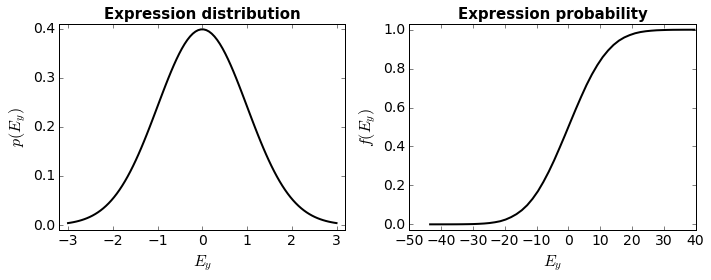

In [590]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Expression distribution", fontsize=15, fontweight="bold")
#p, w = plt.hist(y_distr, color="w", normed=1,bins=bins)[:2]
plt.plot(np.linspace(-3,3,100), mlab.normpdf(np.linspace(-3,3,100),0,1), c="k", lw=2)
plt.xlabel("$E_y$", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("$p(E_y)$", fontsize=16)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=14)
plt.xlim([-3.2, 3.2])
plt.ylim([-0.01,0.41])

p_unit = np.array(p) * np.array([w[i+1]-w[i] for i, _ in enumerate(w) if i != len(w)-1])
P = [sum(p_unit[:i]) for i, _ in enumerate(p_unit)]
y = (w)[:-1]

plt.subplot(1, 2, 2)
plt.title("Expression probability", fontsize=15, fontweight="bold")
plt.plot(y, P, color="k", lw=2)
plt.xlabel("$E_y$", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("$f(E_y)$", fontsize=16)
plt.yticks(fontsize=14)
plt.ylim([-0.03, 1.03])
#plt.xlim([-3, 3])

plt.tight_layout()
#plt.savefig(FIGPATH+"personalityCoefficient.pdf")
plt.show()

In [591]:
n_tests = 15

ex = [0, 1]

x, y = [], []
for j in range(1,n_tests+1):
    true, pred = [], []
    for i in range(50000):
        p_draw = np.random.choice(P, 1, p=p_unit)[0]
        true.append(p_draw)
        pred_i = []
        for _ in range(j):
            pred_i.append(ex[np.random.choice(2, 1, p=[1-p_draw, p_draw])[0]])
        pred.append(np.mean(pred_i))
    x.append(j)
    y.append(pearsonr(pred, true)[0])
    
    print j,

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20


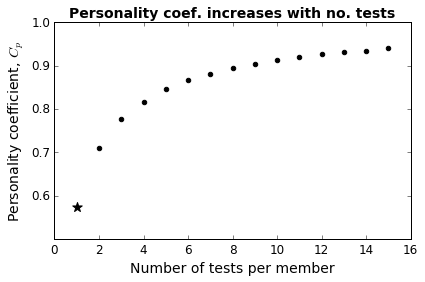

In [592]:
plt.figure()
plt.title("Personality coef. increases with no. tests", fontsize=14, fontweight="bold")
plt.scatter(x[1:15], y[1:15], color="k")
plt.scatter(x[0], y[0], color="k", marker="*", s=100)
plt.xlabel("Number of tests per member", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Personality coefficient, $C_p$", fontsize=14)
plt.yticks([0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.xlim([0, 16])
plt.tight_layout()
#plt.savefig(FIGPATH+"personalityCoefficient.pdf")
plt.show()

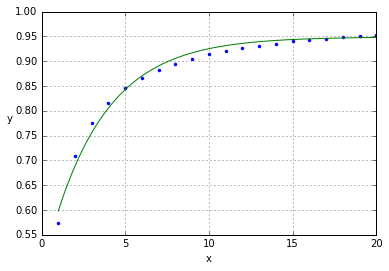

In [593]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def sigmoid(p, x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p, x, y):
    return y - sigmoid(p,x)

p_guess=(np.median(x),np.median(y),1.0,1.0)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(
    residuals,p_guess,args=(x+[1000],y+[1]),full_output=1)  

xp = np.linspace(1, 20, 1500)
pxp=sigmoid(p,xp)

# Plot the results
plt.plot(x, y, '.', xp, pxp, '-')
plt.xlabel('x')
plt.ylabel('y',rotation='horizontal')
plt.grid(True)
plt.show()

## FIGURE

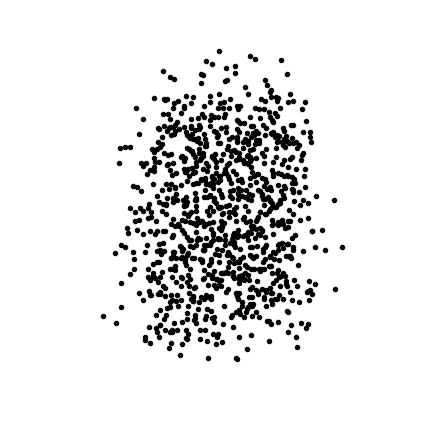

In [4]:
#poly1 = [(0, 1.5), (1.5, 2), (1, 0)]
poly2 = [(0, 0), (1, 0), (0.5, 0.5)]

def sample_points_in_polygon(poly, N, noise_level):
    x = [i[0] for i in poly]
    y = [i[1] for i in poly]

    max_x, min_x = max(x), min(x)
    max_y, min_y = max(y), min(y)

    points = []
    while len(points) < N:
        point_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000)
        point_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000)
        if validate((point_x, point_y), poly):
            if noise_level > 0:
                noise_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000) * noise_level
                noise_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000) * noise_level
                points.append((point_x + noise_x, point_y + noise_y))
            else:
                points.append((point_x, point_y))
    return points

#points1 = sample_points_in_polygon(poly1, 500, 0.5)
points2 = sample_points_in_polygon(poly2, 1000, 0.5)

#X1 = np.array(points1).T
X2 = np.array(points2).T
#A1, S1, C1, _, _= PCHA(X1, 3, delta=0.4)
A2, S2, C2, _, _= PCHA(X2, 6, delta=0.4)

plt.figure(figsize=(6, 6))

plt.scatter([i[0] for i in points2], [i[1] for i in points2], c="k")
#plt.scatter(A2[0, :], A2[1, :], c="w", s=300, lw=5)
plt.axis('off')

plt.tight_layout()
#plt.savefig("/Users/ulfaslak/Dropbox/school/sem12/MScProject/Academic/master_thesis/figures/AA.pdf")
plt.show()